In [40]:
from google.colab import drive

drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
import pandas as pd

In [42]:
data = pd.read_csv('/content/gdrive/MyDrive/Masters Capstone Project/cleaned_data.csv')


* **RFM Analysis**

***Recency (R)***:

This evaluates the time elapsed since the customer's last purchase. It provides insights into how recently a customer has interacted with the business.

***Frequency (F)***:

Frequency refers to the total number of purchases made by a customer within a specific period. It indicates how often a customer engages with the business.

***Monetary (M)***:

Monetary value represents the total amount spent by a customer on purchases. It offers insights into the customer's spending behavior and their contribution to the business revenue.

In [43]:
# define RFM segments, descriptions, and marketing strategies
segments = {
    'Top Tier Customers': {
        'RFM': ['444', '443'],
        'Description': 'High-value customers who recently made frequent purchases and spent the most',
        'Marketing': 'Exclusive VIP offers and early access to new releases'
    },
    'High-Spending Customers': {
        'RFM': ['114', '124', '134', '144', '214', '224', '234', '244', '314', '324', '334', '344', '414', '424', '434', '444'],
        'Description': 'Customers who consistently spend a high amount',
        'Marketing': 'Luxury rewards and personalized concierge service'
    },
    'New High-Spending Customers': {
        'RFM': ['413', '314', '313', '414'],
        'Description': 'New customers with high spending potential',
        'Marketing': 'Welcome bonus and limited-time luxury package deals'
    },
    'Active Loyal Customers': {
        'RFM': ['331', '341', '431', '441'],
        'Description': 'Active customers who make frequent purchases but spend less per transaction',
        'Marketing': 'Loyalty points for every purchase and monthly surprise gifts'
    },
    'Recent Customers': {
        'RFM': ['422', '423', '424', '432', '433', '434', '442', '443', '444'],
        'Description': 'Customers who have made recent purchases',
        'Marketing': 'Flash sales and special discounts for repeat buyers'
    },
    'At-Risk Customers': {
        'RFM': ['244', '234', '243', '233'],
        'Description': 'Customers who were previously active but are showing signs of decreased engagement',
        'Marketing': 'Win-back offers and personalized recovery plans'
    },
    'Lost Best Customers': {
        'RFM': ['144', '134', '143', '133'],
        'Description': 'Customers who were previously loyal but have not made recent purchases',
        'Marketing': 'Comeback deals and special reactivation bonuses'
    },
    'Inactive Low-Spending Customers': {
        'RFM': ['122', '111', '121', '112', '221', '212', '211'],
        'Description': 'Customers with low spending and little recent activity',
        'Marketing': 'Revamp offers with irresistible discounts and surprise freebies'
    }
}

rfm_segments = pd.DataFrame(segments).T.reset_index()
rfm_segments.columns = ['Segment', 'RFM', 'Description', 'Marketing']
rfm_segments


,Segment,RFM,Description,Marketing
0,Top Tier Customers,"[444, 443]",High-value customers who recently made frequen...,Exclusive VIP offers and early access to new r...
1,High-Spending Customers,"[114, 124, 134, 144, 214, 224, 234, 244, 314, ...",Customers who consistently spend a high amount,Luxury rewards and personalized concierge service
2,New High-Spending Customers,"[413, 314, 313, 414]",New customers with high spending potential,Welcome bonus and limited-time luxury package ...
3,Active Loyal Customers,"[331, 341, 431, 441]",Active customers who make frequent purchases b...,Loyalty points for every purchase and monthly ...
4,Recent Customers,"[422, 423, 424, 432, 433, 434, 442, 443, 444]",Customers who have made recent purchases,Flash sales and special discounts for repeat b...
5,At-Risk Customers,"[244, 234, 243, 233]",Customers who were previously active but are s...,Win-back offers and personalized recovery plans
6,Lost Best Customers,"[144, 134, 143, 133]",Customers who were previously loyal but have n...,Comeback deals and special reactivation bonuses
7,Inactive Low-Spending Customers,"[122, 111, 121, 112, 221, 212, 211]",Customers with low spending and little recent ...,Revamp offers with irresistible discounts and ...


**Recency**

In [44]:
from datetime import datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
recency_now_date = data['InvoiceDate'].max()
recency = data.groupby('CustomerID', as_index=False)['InvoiceDate'].max()
recency.columns = ['CustomerID', 'max_date']
recency['Recency'] = (recency_now_date - recency['max_date']).dt.days
recency.drop(['max_date'], axis=1, inplace=True)
recency.head()


,CustomerID,Recency
0,12346.0,316
1,12347.0,30
2,12348.0,66
3,12349.0,9
4,12350.0,301


**Frequency**

In [45]:
frequency = data.groupby('CustomerID', as_index=False)['InvoiceNo'].nunique()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,6
2,12348.0,4
3,12349.0,1
4,12350.0,1


**Monetary**

In [46]:
data['OrderTotal'] = data['Quantity'] * data['UnitPrice']
monetary = data.groupby('CustomerID', as_index=False)['OrderTotal'].sum()
monetary.columns = ['CustomerID', 'Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4085.18
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [47]:
rf = recency.merge(frequency, on='CustomerID')
rfm_table = rf.merge(monetary, on='CustomerID')
rfm_table.set_index('CustomerID',inplace=True)
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,316,2,0.00
12347.0,30,6,4085.18
12348.0,66,4,1797.24
12349.0,9,1,1757.55
12350.0,301,1,334.40


* **Segmenting customers with RFM analysis**

Customer segments in the RFM model are determined by assigning scores from 1 to 4 for Recency, Frequency, and Monetary metrics. These scores are then combined to create an overall RFM score, enabling businesses to categorize customers effectively for targeted marketing efforts.

In [48]:
rfm_quantiles = rfm_table.quantile(q=[0.25, 0.5, 0.75])
rfm_quantiles


,Recency,Frequency,Monetary
0.25,15.0,1.0,288.755
0.50,48.0,3.0,628.780
0.75,144.0,5.0,1545.905


In [49]:
quantiles_dict = rfm_quantiles.to_dict()
quantiles_dict


{'Recency': {0.25: 15.0, 0.5: 48.0, 0.75: 144.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0},
 'Monetary': {0.25: 288.755, 0.5: 628.78, 0.75: 1545.9050000000002}}

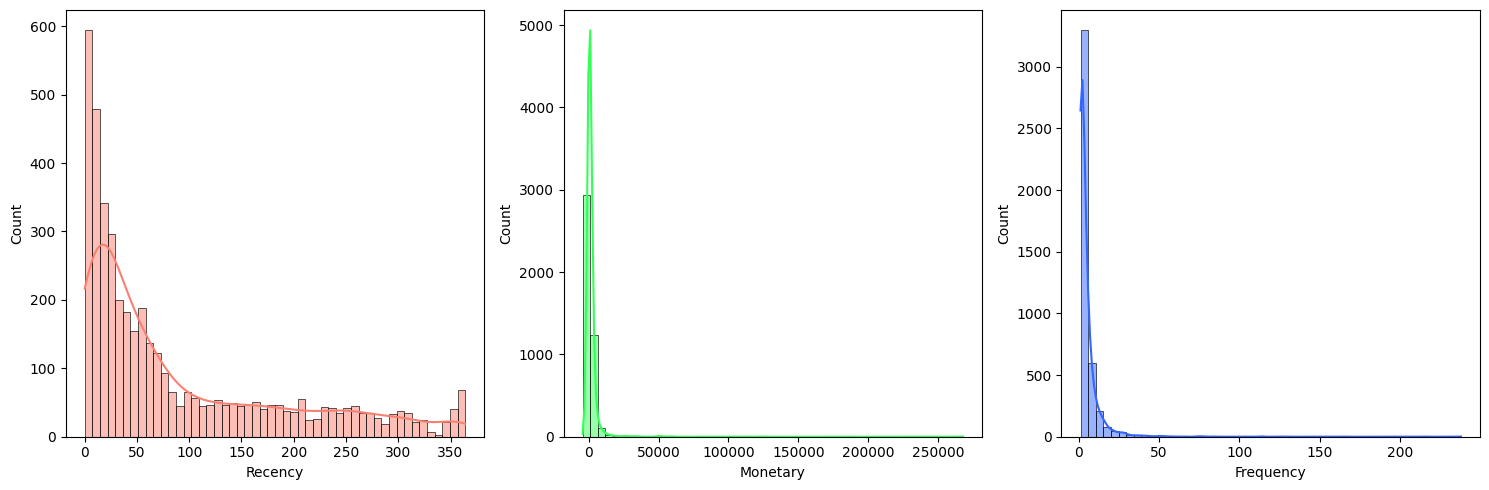

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


colors = ['#FA8072', '#33FF57', '#3366FF']

# Visualize RFM distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm_table['Recency'], bins=50, color=colors[0], kde=True)
plt.xlabel('Recency')

plt.subplot(1, 3, 2)
sns.histplot(rfm_table['Monetary'], bins=50, color=colors[1], kde=True)
plt.xlabel('Monetary')

plt.subplot(1, 3, 3)
sns.histplot(rfm_table['Frequency'], bins=50, color=colors[2], kde=True)
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

* **RFM Segments**

In [51]:
# Define functions for assigning quartile scores
def assign_R_score(x, p, d):
    return 4 if x <= d[p][0.25] else 3 if x <= d[p][0.50] else 2 if x <= d[p][0.75] else 1

def assign_FM_score(x, p, d):
    return 1 if x <= d[p][0.25] else 2 if x <= d[p][0.50] else 3 if x <= d[p][0.75] else 4

rfm_segment = rfm_table.copy()

# Assign quartile scores for Recency, Frequency, and Monetary
rfm_segment['R_Quartile'] = [assign_R_score(x, 'Recency', rfm_quantiles) for x in rfm_segment['Recency']]
rfm_segment['F_Quartile'] = [assign_FM_score(x, 'Frequency', rfm_quantiles) for x in rfm_segment['Frequency']]
rfm_segment['M_Quartile'] = [assign_FM_score(x, 'Monetary', rfm_quantiles) for x in rfm_segment['Monetary']]
rfm_segment.head()


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,316,2,0.00,1,2,1
12347.0,30,6,4085.18,3,4,4
12348.0,66,4,1797.24,2,3,4
12349.0,9,1,1757.55,4,1,4
12350.0,301,1,334.40,1,1,2


In [52]:
# Combine scores into RFM score
rfm_segment['RFMScore'] = rfm_segment['R_Quartile'].map(str) + rfm_segment['F_Quartile'].map(str) + rfm_segment['M_Quartile'].map(str)
rfm_segment.head()


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346.0,316,2,0.00,1,2,1,121
12347.0,30,6,4085.18,3,4,4,344
12348.0,66,4,1797.24,2,3,4,234
12349.0,9,1,1757.55,4,1,4,414
12350.0,301,1,334.40,1,1,2,112


In [53]:
# Allocate segments to each customer based on their RFM score
def allocate_segment(rfm_score):
    for segment, details in segments.items():
        if rfm_score in details['RFM']:
            return segment
    return 'Others'

# Apply the allocation function to the RFM DataFrame
rfm_segment['Segment'] = rfm_segment['RFMScore'].apply(allocate_segment)

rfm_segment.sample(10)



,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
CustomerID,,,,,,,,
17212.0,243,1,226.85,1,1,1,111,Inactive Low-Spending Customers
16626.0,13,18,3855.44,4,4,4,444,Top Tier Customers
17148.0,42,1,124.88,3,1,1,311,Others
16419.0,103,7,945.96,2,4,3,243,At-Risk Customers
15388.0,261,1,140.54,1,1,1,111,Inactive Low-Spending Customers
17819.0,62,8,3661.07,2,4,4,244,High-Spending Customers
12726.0,19,7,2609.10,3,4,4,344,High-Spending Customers
14006.0,106,3,962.19,2,2,3,223,Others
16968.0,98,1,253.31,2,1,1,211,Inactive Low-Spending Customers


In [54]:
rfm_segment.to_excel('RFM Segment.xlsx')

* **K-means clustering**

In [55]:
from scipy import stats

# Function to check for skewness
def check_skew(df, column):
    skew_value = stats.skew(df[column])
    skew_test = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.histplot(df[column], kde=True, stat='density', linewidth=0)
    print("{}'s Skewness: {}, Skewness Test: {}".format(column, skew_value, skew_test))
    return


In [56]:
print(rfm_segment.columns)


Index(['Recency', 'Frequency', 'Monetary', 'R_Quartile', 'F_Quartile',
       'M_Quartile', 'RFMScore', 'Segment'],
      dtype='object')


In [57]:
rfm_segments = rfm_segment[['Recency', 'Frequency', 'Monetary']]
rfm_segments.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,316,2,0.00
12347.0,30,6,4085.18
12348.0,66,4,1797.24
12349.0,9,1,1757.55
12350.0,301,1,334.40


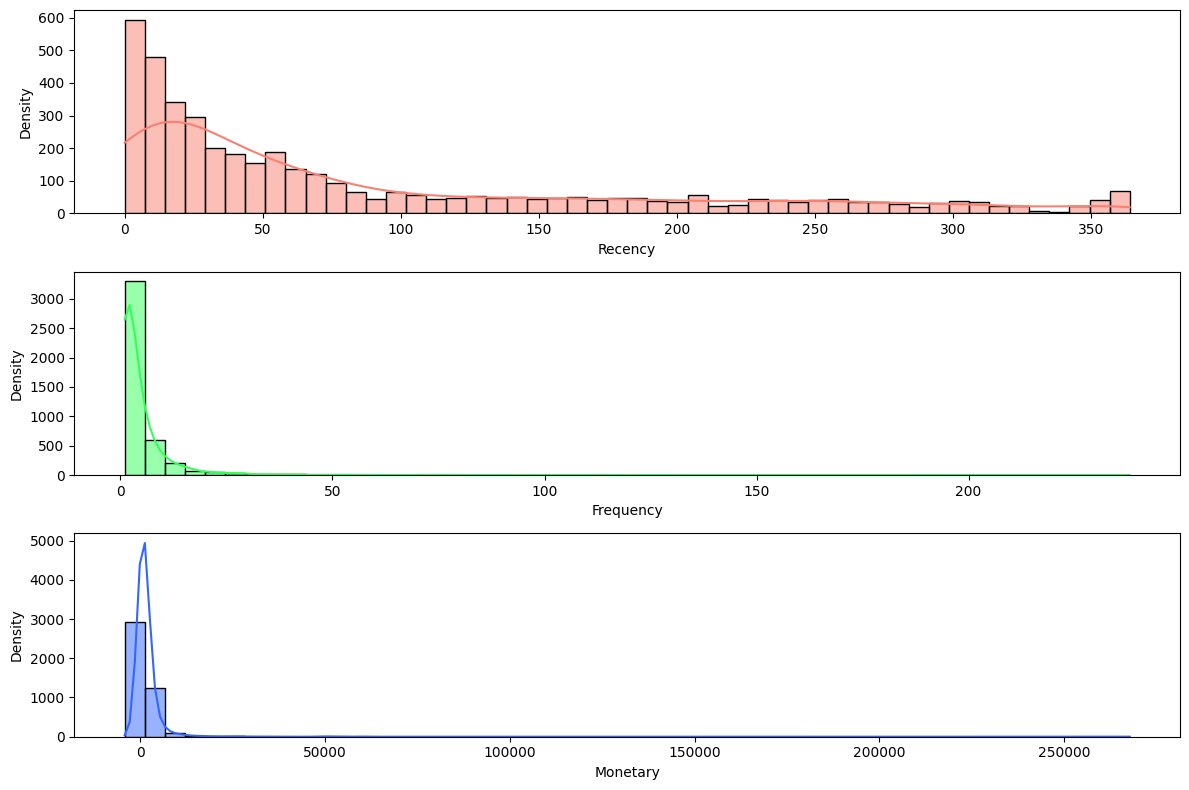

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#FA8072', '#33FF57', '#3366FF']

plt.figure(figsize=(12, 8))

for i, column in enumerate(['Recency', 'Frequency', 'Monetary'], start=1):
    plt.subplot(3, 1, i)
    sns.histplot(rfm_segments[column], bins=50, color=colors[i-1], kde=True)
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()




The data is skewed, so we need to change and adjust it before continuing. This is important because K-Means requires variables to have symmetric distributions, free from skewness, and uniform average values and variance across them.

In [59]:
rfm_table.describe()

,Recency,Frequency,Monetary
count,4331.000000,4331.000000,4331.000000
mean,90.252828,4.910875,1832.597551
std,99.388939,9.025901,7944.283177
min,0.000000,1.000000,-4287.630000
25%,15.000000,1.000000,288.755000
50%,48.000000,3.000000,628.780000
75%,144.000000,5.000000,1545.905000
max,364.000000,238.000000,267761.000000


In [60]:
import copy
rfm_table_scaled = copy.deepcopy(rfm_table)

# Shift the values in the 'Monetary' and 'Recency' columns to ensure they are all positive
rfm_table_scaled['Monetary'] = rfm_table_scaled['Monetary'].add(abs(rfm_table_scaled['Monetary'].min()) + 1)
rfm_table_scaled['Recency'] = rfm_table_scaled['Recency'].add(abs(rfm_table_scaled['Recency'].min()) + 1)
rfm_table_scaled.describe()

,Recency,Frequency,Monetary
count,4331.000000,4331.000000,4331.000000
mean,91.252828,4.910875,6121.227551
std,99.388939,9.025901,7944.283177
min,1.000000,1.000000,1.000000
25%,16.000000,1.000000,4577.385000
50%,49.000000,3.000000,4917.410000
75%,145.000000,5.000000,5834.535000
max,365.000000,238.000000,272049.630000


In [61]:
import numpy as np

log_df = np.log(rfm_table_scaled)


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_df = scaler.fit_transform(log_df)
normalized_df = pd.DataFrame(data=normalized_df, index=rfm_table_scaled.index, columns=rfm_table_scaled.columns)
normalized_df


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.386670,-0.369465,-0.687546
12347.0,-0.197660,0.790665,1.180610
12348.0,0.327543,0.362496,0.289615
12349.0,-0.968662,-1.101426,0.271348
12350.0,1.353636,-1.101426,-0.477924
...,...,...,...
18280.0,1.274781,-1.101426,-0.572384
18281.0,0.970022,-1.101426,-0.635422
18282.0,0.689741,-0.369465,-0.623983


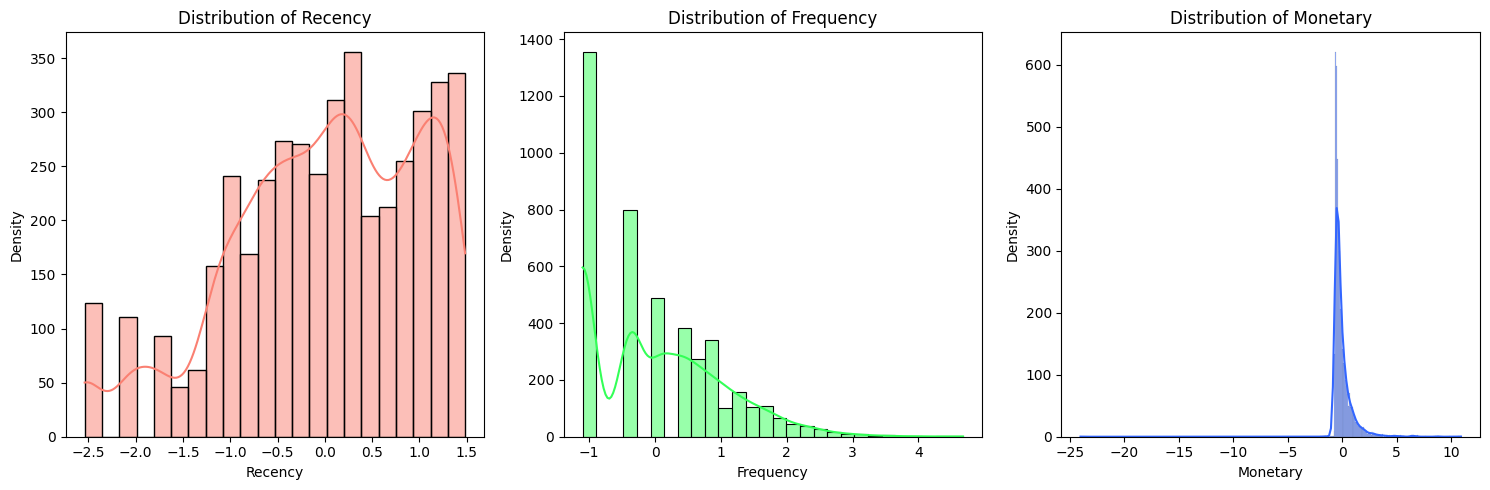

In [63]:
plt.figure(figsize=(15, 5))

colors = ['#FA8072', '#33FF57', '#3366FF']

# Distribution plot for Recency
plt.subplot(1, 3, 1)
sns.histplot(normalized_df['Recency'], color=colors[0], kde=True)
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Density')

# Distribution plot for Frequency
plt.subplot(1, 3, 2)
sns.histplot(normalized_df['Frequency'], color=colors[1], kde=True)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Density')

# Distribution plot for Monetary
plt.subplot(1, 3, 3)
sns.histplot(normalized_df['Monetary'], color=colors[2], kde=True)
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


Upon examining the distributions, it's evident that the means and averages are now approximately uniform across each distribution. With this transformation, the data is now suitable for the application of unsupervised learning algorithms like K-Means.

* **Determine the ideal number of clusters for segmentation**

**Silhouette Score**

Silhouette score for 3 cluster(s): 0.39481611037094405
Silhouette score for 4 cluster(s): 0.34968465734005066
Silhouette score for 5 cluster(s): 0.3601974894893054
Silhouette score for 6 cluster(s): 0.3631074326874259
Silhouette score for 7 cluster(s): 0.3569653518454236
Silhouette score for 8 cluster(s): 0.3508595973584007
Silhouette score for 9 cluster(s): 0.34726395378441416
Silhouette score for 10 cluster(s): 0.3486077745005304
Silhouette score for 11 cluster(s): 0.3558703437756729


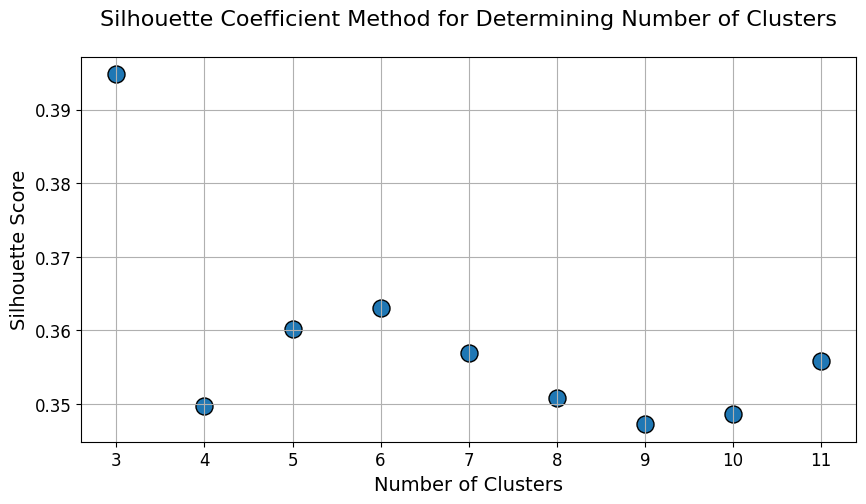

In [82]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss_silhouette = []
for num_clusters in range(3, 12):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, init='k-means++').fit(normalized_df)
    cluster_preds = kmeans.predict(normalized_df)
    silhouette = silhouette_score(normalized_df, cluster_preds)
    wcss_silhouette.append(silhouette)
    print(f"Silhouette score for {num_clusters} cluster(s): {silhouette}")

plt.figure(figsize=(10, 5))
plt.title("Silhouette Coefficient Method for Determining Number of Clusters\n", fontsize=16)
plt.scatter(x=range(3, 12), y=wcss_silhouette, s=150, edgecolor='k')
plt.grid(True)
plt.xlabel("Number of Clusters", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.xticks(range(3, 12), fontsize=12)
plt.yticks(fontsize=12)
plt.show()


The analysis strongly indicates that the optimal number of clusters is 4, as it's evident from the point where the mean cluster distance flattens out after a significant decrease.

In [101]:
from sklearn.manifold import TSNE

def apply_kmeans(normalized_df_rfm, num_clusters, original_df_rfm):
    kmeans = KMeans(n_clusters=num_clusters, random_state=1)
    kmeans.fit(normalized_df_rfm)
    cluster_labels = kmeans.labels_
    df_new = original_df_rfm.assign(Cluster=cluster_labels)

    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)

    plt.title('Cluster Distribution with {} Clusters'.format(num_clusters))
    sns.scatterplot(x=transformed[:, 0], y=transformed[:, 1], hue=cluster_labels, style=cluster_labels, palette='Set1')
    return df_new

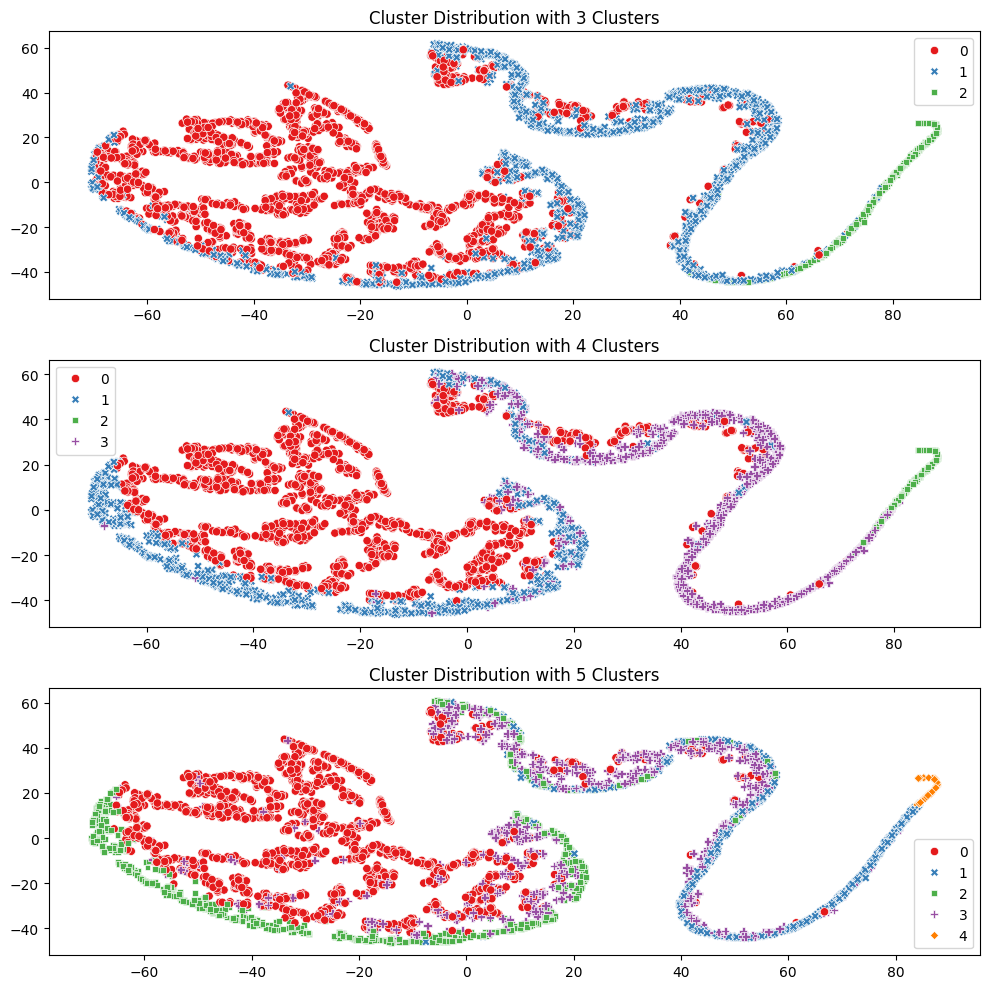

In [102]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = apply_kmeans(normalized_df, 3, rfm_table_scaled)

plt.subplot(3, 1, 2)
df_rfm_k4 = apply_kmeans(normalized_df, 4, rfm_table_scaled)

plt.subplot(3, 1, 3)
df_rfm_k5 = apply_kmeans(normalized_df, 5, rfm_table_scaled)

plt.tight_layout()

In [103]:
df_rfm_k4.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']
}).round(0)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         172.0       2.0   4761.0  1952
1          21.0       2.0   4878.0  1032
2          13.0      32.0  24909.0   173
3          31.0       8.0   6707.0  1174

Based on these characteristics, we can make assumptions about the segments as follows:

- **Cluster 0: Low Spending, Active Customers** - These customers have made moderate-value purchases relatively recently but with low frequency. They may be occasional shoppers or customers who haven't made purchases recently.
- **Cluster 1: Low Spending, Active Customers** - Similar to Cluster 0, these customers have made recent, low-frequency purchases but with slightly higher monetary value compared to Cluster 0.
- **Cluster 2: High-Value, Engaged Customers** - This small group consists of highly engaged and high-value customers. They have made very recent, frequent, and high-value purchases. They are likely loyal and high-spending customers.
- **Cluster 3: Moderate Spending, Engaged Customers** - Customers in this cluster have made moderately recent purchases with moderate frequency and monetary value. They are relatively engaged and valuable customers but not as much as those in Cluster 2.